In [ ]:
import pandas as pd
import urllib.request
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

url = 'https://mushroom.mathematik.uni-marburg.de/files/SecondaryData/secondary_data_no_miss.csv'

response = urllib.request.urlopen(url)

df = pd.read_csv(response, delimiter=';')

print(df.head())

  class  cap-diameter cap-shape cap-surface cap-color does-bruise-or-bleed  \
0     e          1.26         x           g         y                    f   
1     e         10.32         f           e         b                    f   
2     p          0.92         x           g         p                    f   
3     p          4.27         x           t         p                    f   
4     e          3.08         f           s         w                    f   

  gill-attachment gill-spacing gill-color  stem-height  stem-width stem-color  \
0               d            c          w         5.04        1.73          y   
1               a            c          b         4.68       19.44          w   
2               a            c          p         4.59        1.15          k   
3               x            c          w         4.55        6.52          w   
4               d            d          w         2.67        5.18          w   

  has-ring ring-type habitat season  
0     

In [ ]:
df.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.746893,6.588775,12.155013
std,5.262972,3.362591,9.989620
min,0.410000,0.000000,0.000000
25%,3.490000,4.640000,5.200000
50%,5.890000,5.960000,10.180000
75%,8.540000,7.760000,16.600000
max,61.580000,35.790000,100.830000


In [ ]:
df.nunique()

class                      2
cap-diameter            2564
cap-shape                  7
cap-surface               11
cap-color                 12
does-bruise-or-bleed       2
gill-attachment            7
gill-spacing               3
gill-color                12
stem-height             2198
stem-width              4634
stem-color                13
has-ring                   2
ring-type                  8
habitat                    8
season                     4
dtype: int64

In [ ]:
most=df.mode()
print(most)

  class  cap-diameter cap-shape cap-surface cap-color does-bruise-or-bleed  \
0     p           3.2         x           t         n                    f   

  gill-attachment gill-spacing gill-color  stem-height  stem-width stem-color  \
0               a            c          w          0.0         0.0          w   

  has-ring ring-type habitat season  
0        f         f       d      a  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           61069 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       61069 non-null  object 
 7   gill-spacing          61069 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-color            61069 non-null  object 
 12  has-ring              61069 non-null  object 
 13  ring-type             61069 non-null  object 
 14  habitat               61069 non-null  object 
 15  season             

In [ ]:
df['class'].value_counts()

p    33888
e    27181
Name: class, dtype: int64

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64


In [ ]:
missing = df.isnull()
missing_count = missing.sum(axis=1)
nomiss = df[missing_count == 0]
df_filtered = nomiss.dropna()
len(df_filtered)

61069

In [ ]:
object_columns = df.select_dtypes(include='object').columns
df[object_columns] = df[object_columns].astype('category')
df.dtypes

class                   category
cap-diameter             float64
cap-shape               category
cap-surface             category
cap-color               category
does-bruise-or-bleed    category
gill-attachment         category
gill-spacing            category
gill-color              category
stem-height              float64
stem-width               float64
stem-color              category
has-ring                category
ring-type               category
habitat                 category
season                  category
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for column in df.columns:
    if column not in ['cap-diameter', 'stem-height', 'stem-width']:
        df[column] = labelencoder.fit_transform(df[column])
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,0,1.26,6,2,11,0,1,0,10,5.04,1.73,12,0,1,0,0
1,0,10.32,2,1,0,0,0,0,0,4.68,19.44,11,1,1,0,0
2,1,0.92,6,2,7,0,0,0,7,4.59,1.15,4,0,1,0,2
3,1,4.27,6,8,7,0,6,0,10,4.55,6.52,11,0,1,0,0
4,0,3.08,2,7,10,0,1,1,10,2.67,5.18,11,0,1,4,0


In [ ]:
df.corr()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
class,1.000000,-0.182147,-0.108724,-0.024206,0.026110,-0.019889,-0.095538,-0.049022,-0.061487,-0.122285,-0.198699,-0.095813,0.057559,0.090540,-0.049540,-0.061439
cap-diameter,-0.182147,1.000000,0.106303,0.070788,0.042897,0.179432,0.171675,-0.120330,0.222411,0.423610,0.698571,0.009930,0.077267,0.033751,-0.120552,0.036834
cap-shape,-0.108724,0.106303,1.000000,-0.064102,0.020991,0.192546,0.044843,-0.036159,0.114409,0.034559,0.159248,0.006356,0.035946,0.150165,-0.123624,-0.020460
cap-surface,-0.024206,0.070788,-0.064102,1.000000,0.110711,-0.096972,0.027303,0.048071,-0.022527,0.074511,0.063037,0.115282,0.103524,-0.046289,0.062044,0.014230
cap-color,0.026110,0.042897,0.020991,0.110711,1.000000,0.011434,0.004849,-0.008824,0.132791,-0.010825,0.000974,0.262380,0.071216,-0.012093,0.027581,0.012157
does-bruise-or-bleed,-0.019889,0.179432,0.192546,-0.096972,0.011434,1.000000,0.046333,-0.147406,0.023882,0.076824,0.185218,-0.023666,0.019195,0.000769,-0.102834,-0.051611
gill-attachment,-0.095538,0.171675,0.044843,0.027303,0.004849,0.046333,1.000000,0.066300,0.102116,0.073091,0.229836,0.004854,-0.143852,-0.111822,-0.052724,-0.021749
gill-spacing,-0.049022,-0.120330,-0.036159,0.048071,-0.008824,-0.147406,0.066300,1.000000,-0.314653,-0.221436,0.047681,-0.075571,-0.108506,-0.121087,-0.010034,0.055592
gill-color,-0.061487,0.222411,0.114409,-0.022527,0.132791,0.023882,0.102116,-0.314653,1.000000,0.161647,0.115049,0.144613,-0.055133,-0.006271,-0.079168,-0.003924
stem-height,-0.122285,0.423610,0.034559,0.074511,-0.010825,0.076824,0.073091,-0.221436,0.161647,1.000000,0.433756,0.137507,0.280782,0.186689,-0.012678,-0.018283


In [ ]:
df.corr()['class']

class                   1.000000
cap-diameter           -0.182147
cap-shape              -0.108724
cap-surface            -0.024206
cap-color               0.026110
does-bruise-or-bleed   -0.019889
gill-attachment        -0.095538
gill-spacing           -0.049022
gill-color             -0.061487
stem-height            -0.122285
stem-width             -0.198699
stem-color             -0.095813
has-ring                0.057559
ring-type               0.090540
habitat                -0.049540
season                 -0.061439
Name: class, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df.drop('class', axis=1)
y = df['class']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
selected_features = []

scoring_metric = 'accuracy'

for feature in X_train.columns:
    selected_features.append(feature)

    model = LogisticRegression(max_iter=10000)
    model.fit(X_train[selected_features], y_train)

    score = model.score(X_val[selected_features], y_val)

    print(f"Selected Features: {selected_features}")
    print(f"Validation Set {scoring_metric}: {score}")
    print()

Selected Features: ['cap-diameter']
Validation Set accuracy: 0.5838382184378582

Selected Features: ['cap-diameter', 'cap-shape']
Validation Set accuracy: 0.5769608645816277

Selected Features: ['cap-diameter', 'cap-shape', 'cap-surface']
Validation Set accuracy: 0.5762240052398887

Selected Features: ['cap-diameter', 'cap-shape', 'cap-surface', 'cap-color']
Validation Set accuracy: 0.5700835107253971

Selected Features: ['cap-diameter', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed']
Validation Set accuracy: 0.5769608645816277

Selected Features: ['cap-diameter', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment']
Validation Set accuracy: 0.5853119371213362

Selected Features: ['cap-diameter', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing']
Validation Set accuracy: 0.5881775012280989

Selected Features: ['cap-diameter', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', '

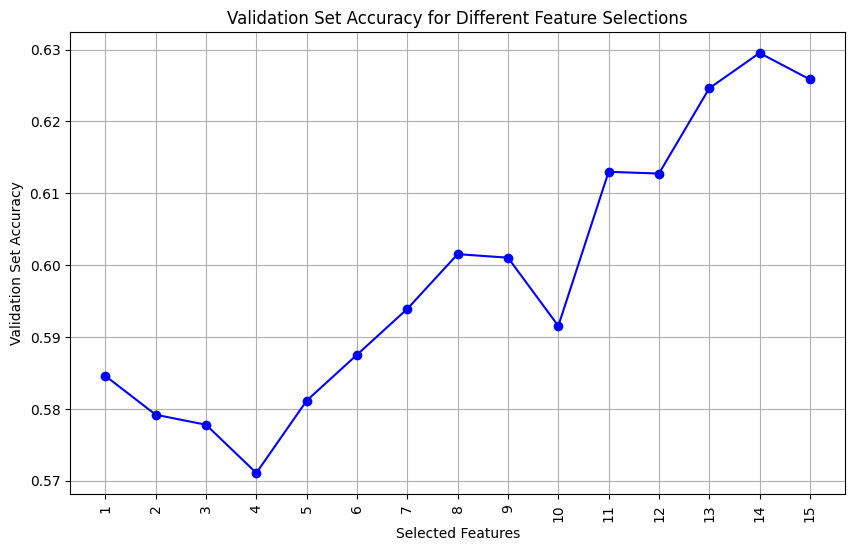

In [ ]:
import matplotlib.pyplot as plt

selected_features = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15']

validation_accuracy = [0.5845750777795972, 0.5791714426068446, 0.5777795971835599, 0.5710659898477157, 0.5811364008514819, 0.5875225151465532, 0.5939086294416244, 0.6015228426395939, 0.6010316030784346, 0.591534304896021, 0.6129850990666448, 0.6127394792860652, 0.6246111020140822, 0.6295234976256755, 0.6258392009169805]

plt.figure(figsize=(10, 6))
plt.plot(selected_features, validation_accuracy, marker='o', linestyle='-', color='b')
plt.xticks(rotation=90)
plt.xlabel('Selected Features')
plt.ylabel('Validation Set Accuracy')
plt.title('Validation Set Accuracy for Different Feature Selections')
plt.grid(True)


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df.drop('class', axis=1)
y = df['class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=15)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=X_pca, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15'])
pca_df['class'] = y

explained_variance_ratio = pca.explained_variance_ratio_
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Explained variance ratio of PC{i+1}: {ratio}")

print(pca_df.head())

Explained variance ratio of PC1: 0.1740459766797508
Explained variance ratio of PC2: 0.11670802112834944
Explained variance ratio of PC3: 0.09345037881996977
Explained variance ratio of PC4: 0.08859082635763037
Explained variance ratio of PC5: 0.07396284848086389
Explained variance ratio of PC6: 0.0674733105059802
Explained variance ratio of PC7: 0.061737007960721305
Explained variance ratio of PC8: 0.05940677732266105
Explained variance ratio of PC9: 0.05653210590344794
Explained variance ratio of PC10: 0.05218688706731385
Explained variance ratio of PC11: 0.04776366932843694
Explained variance ratio of PC12: 0.03793200697852644
Explained variance ratio of PC13: 0.032009409484357744
Explained variance ratio of PC14: 0.027322492692978824
Explained variance ratio of PC15: 0.010878281289011537
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.076779  0.354595 -0.585417 -2.641085  1.067840 -0.315084 -0.519758   
1 -0.007292  0.622732  1.750026  1.371309 -0.85

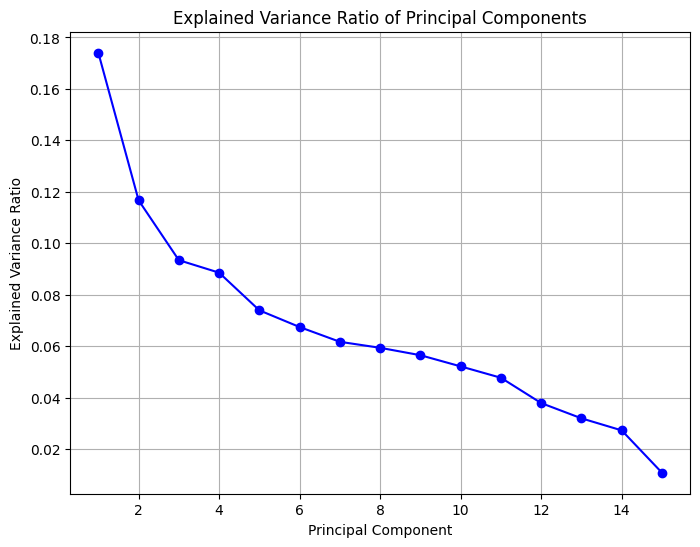

In [ ]:
explained_variance_ratio = [0.1740459766797508, 0.11670802112834944, 0.09345037881996977, 0.08859082635763037, 0.07396284848086389,
                            0.0674733105059802, 0.061737007960721305, 0.05940677732266105, 0.05653210590344794, 0.05218688706731385,
                            0.04776366932843694, 0.03793200697852644, 0.032009409484357744, 0.027322492692978824, 0.010878281289011537]

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-', color='b')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.grid(True)
plt.show()

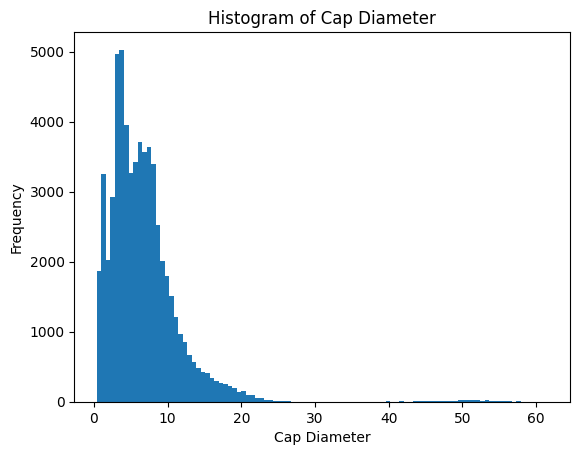

In [ ]:
plt.hist(df['cap-diameter'], bins=100)
plt.xlabel('Cap Diameter')
plt.ylabel('Frequency')
plt.title('Histogram of Cap Diameter')
plt.show()


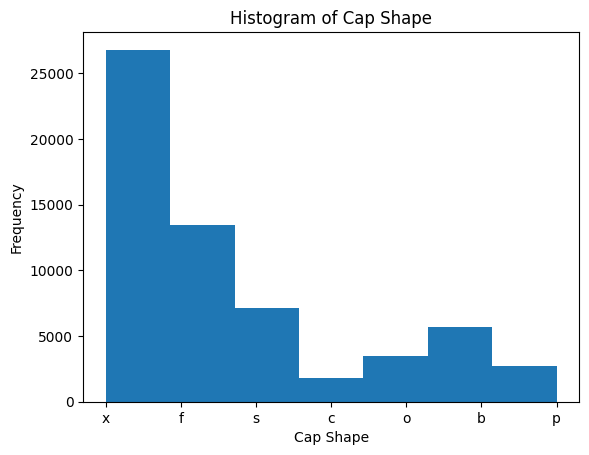

In [ ]:
plt.hist(df['cap-shape'], bins=7)
plt.xlabel('Cap Shape')
plt.ylabel('Frequency')
plt.title('Histogram of Cap Shape')
plt.show()

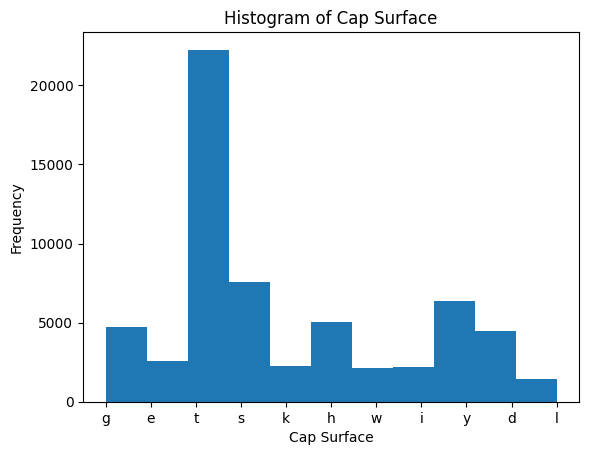

In [ ]:
plt.hist(df['cap-surface'], bins=11)
plt.xlabel('Cap Surface')
plt.ylabel('Frequency')
plt.title('Histogram of Cap Surface')
plt.show()

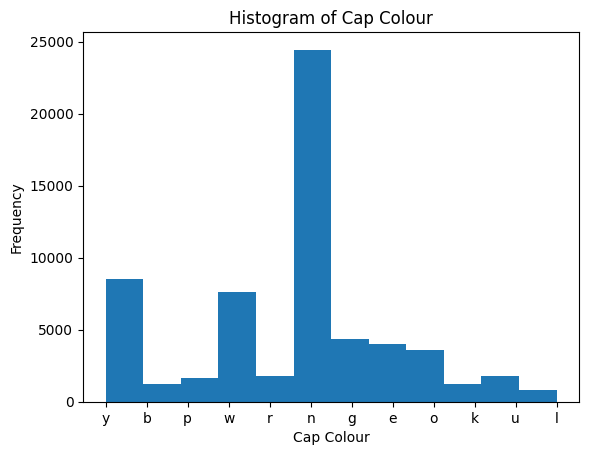

In [ ]:
plt.hist(df['cap-color'], bins=12)
plt.xlabel('Cap Colour')
plt.ylabel('Frequency')
plt.title('Histogram of Cap Colour')
plt.show()

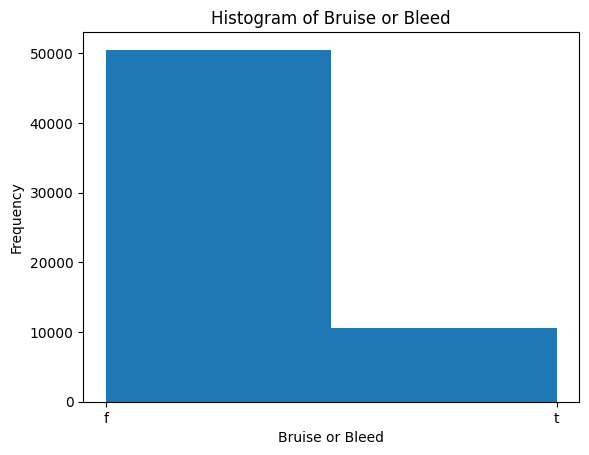

In [ ]:
plt.hist(df['does-bruise-or-bleed'], bins=2)
plt.xlabel('Bruise or Bleed')
plt.ylabel('Frequency')
plt.title('Histogram of Bruise or Bleed')
plt.show()

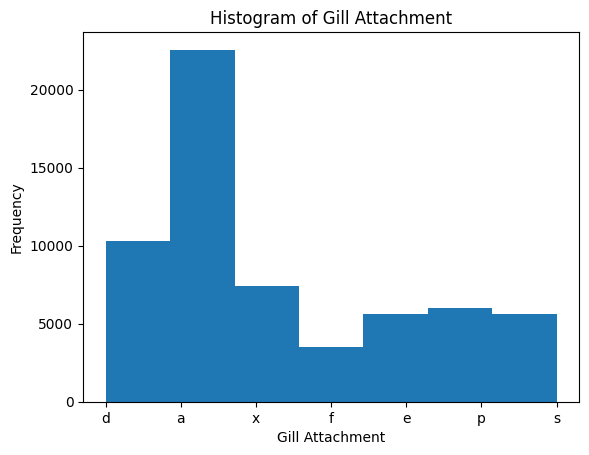

In [ ]:
plt.hist(df['gill-attachment'], bins=7)
plt.xlabel('Gill Attachment')
plt.ylabel('Frequency')
plt.title('Histogram of Gill Attachment')
plt.show()

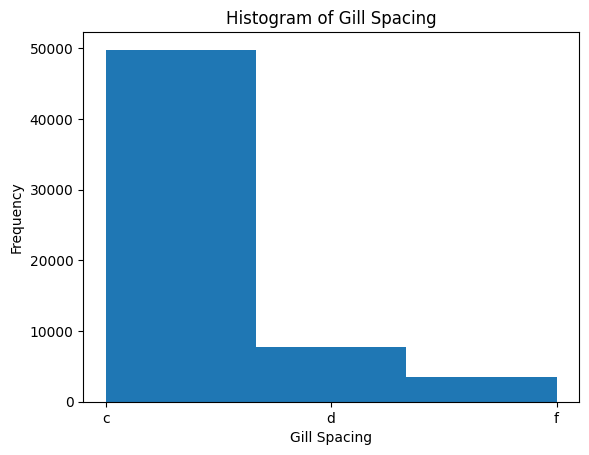

In [ ]:
plt.hist(df['gill-spacing'], bins=3)
plt.xlabel('Gill Spacing')
plt.ylabel('Frequency')
plt.title('Histogram of Gill Spacing')
plt.show()

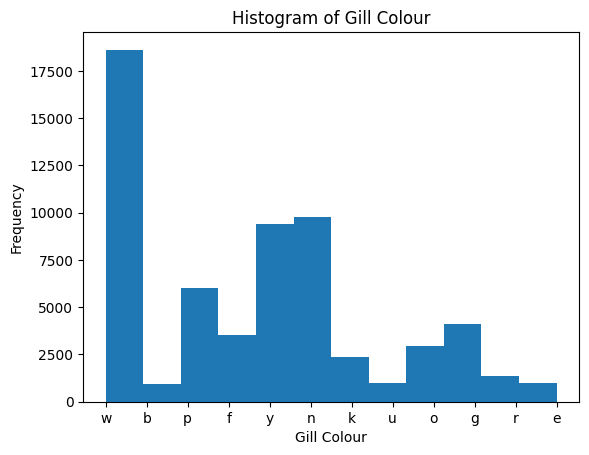

In [ ]:
plt.hist(df['gill-color'], bins=12)
plt.xlabel('Gill Colour')
plt.ylabel('Frequency')
plt.title('Histogram of Gill Colour')
plt.show()

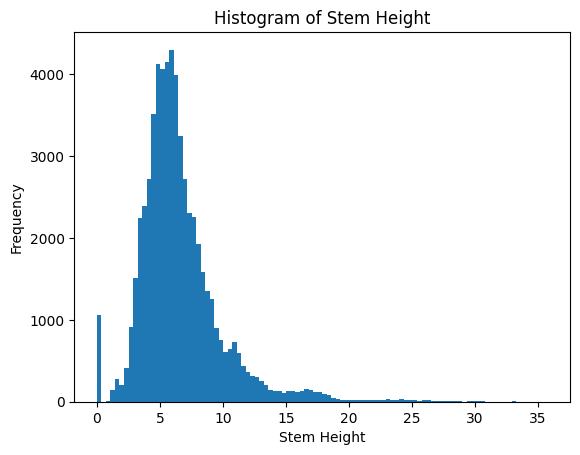

In [ ]:
plt.hist(df['stem-height'], bins=100)
plt.xlabel('Stem Height')
plt.ylabel('Frequency')
plt.title('Histogram of Stem Height')
plt.show()

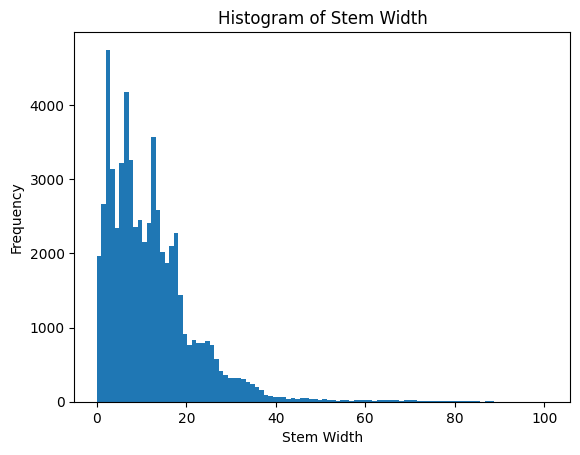

In [ ]:
plt.hist(df['stem-width'], bins=100)
plt.xlabel('Stem Width')
plt.ylabel('Frequency')
plt.title('Histogram of Stem Width')
plt.show()

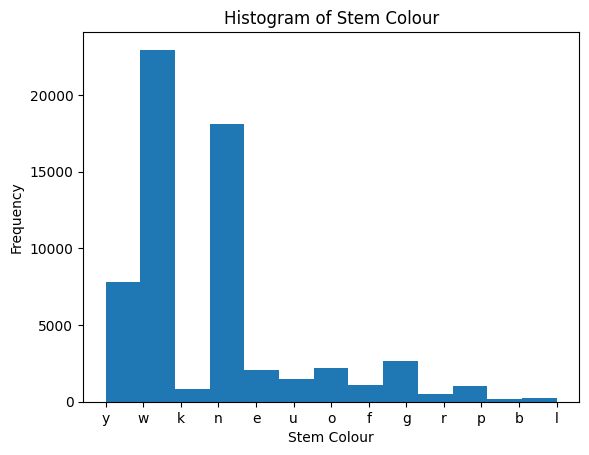

In [ ]:
plt.hist(df['stem-color'], bins=13)
plt.xlabel('Stem Colour')
plt.ylabel('Frequency')
plt.title('Histogram of Stem Colour')
plt.show()

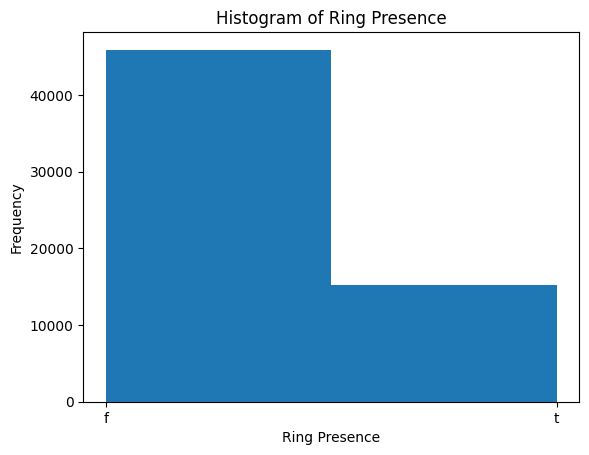

In [ ]:
plt.hist(df['has-ring'], bins=2)
plt.xlabel('Ring Presence')
plt.ylabel('Frequency')
plt.title('Histogram of Ring Presence')
plt.show()

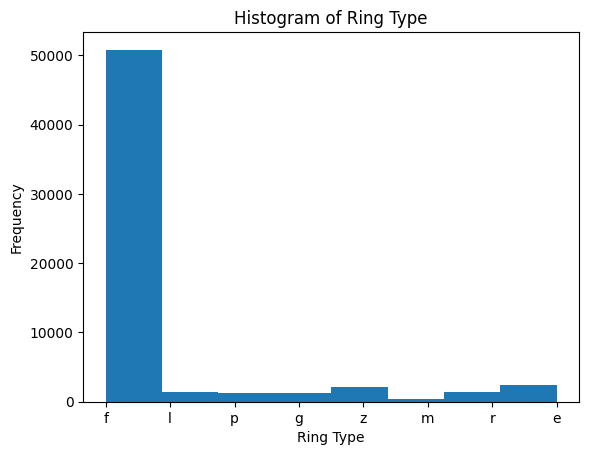

In [ ]:
plt.hist(df['ring-type'], bins=8)
plt.xlabel('Ring Type')
plt.ylabel('Frequency')
plt.title('Histogram of Ring Type')
plt.show()

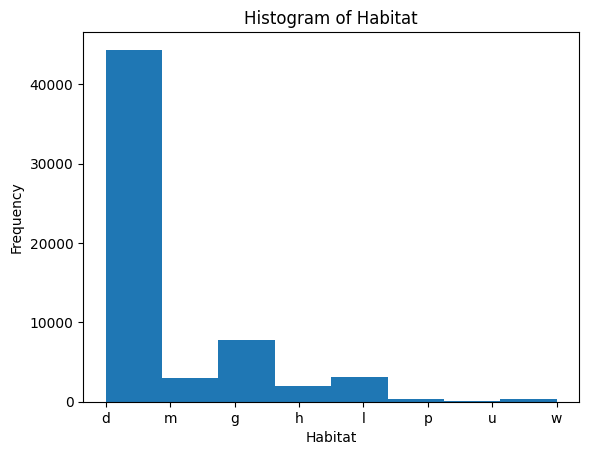

In [ ]:
plt.hist(df['habitat'], bins=8)
plt.xlabel('Habitat')
plt.ylabel('Frequency')
plt.title('Histogram of Habitat')
plt.show()

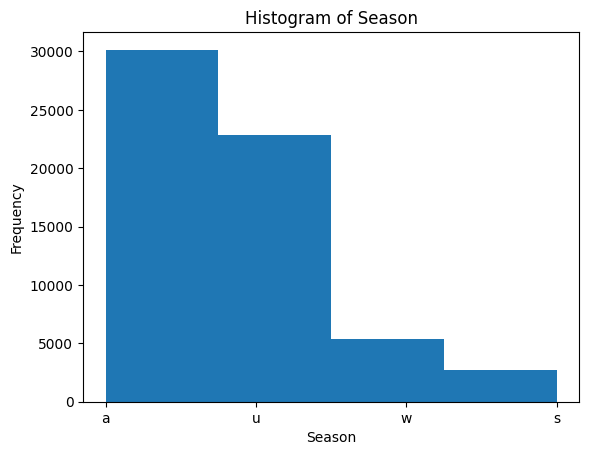

In [ ]:
plt.hist(df['season'], bins=4)
plt.xlabel('Season')
plt.ylabel('Frequency')
plt.title('Histogram of Season')
plt.show()

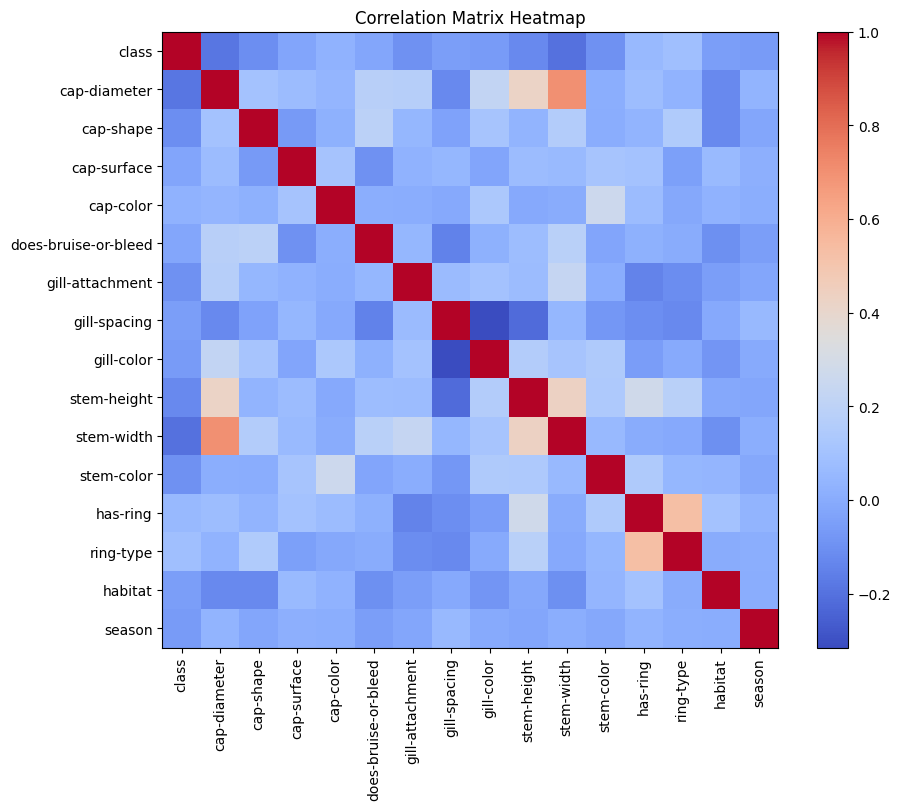

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix Heatmap')
plt.show()